In [1]:
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, Math

import plotly.express as px
import plotly.graph_objects as go
import plotly as py
import matplotlib.pyplot as plt

### Parameters

In [2]:
cs = 343

f = 40e3  # carrier frequency
T = 1/f

wavelength = cs/f

# Linear phased array beamforming

In [3]:
def transducerPhase(n, d, phi):
  wavelength = cs/f

  return np.cos(n * 2 * np.pi / wavelength * d * np.sin(phi))

def transducer(n, d, phi, f, t):
  w = 2 * np.pi * f
  wavelength = cs/f
  
  return np.cos(w * t + n * 2 * np.pi / wavelength * d * np.sin(phi))


In [4]:
def angularEnergy(V):
  vE = np.abs(V)
  E = np.array(np.sum(vE, 1)).flatten()
  E_dB = 20 * np.log10(E/max(E))
  return E_dB

## 2 transducer

### Time signals

In [5]:
t = np.arange(-T, T, T/100)

phi_slider = widgets.FloatSlider(
    value=0,
    min=-np.pi,
    max=np.pi,
    step=0.01,
    description="Angle: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

d_slider = widgets.FloatSlider(
    value=wavelength/2,
    min=0,
    max=wavelength,
    step=wavelength/100,
    description="Distance: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)


@interact(phi=phi_slider, d=d_slider)
def plot2DBeamSignals(phi, d):
  E1 = transducer(0, d, phi, f, t)
  E2 = transducer(1, d, phi, f, t)
  E = E1 + E2
  
  # plt = px.line(x=t, y=[E1, E2, E])
  # display(plt)
  
  plt.figure(figsize=[10,4])
  plt.plot(t, E1, t, E2, t, E)
  plt.ylim(-2, 2)
  plt.xlim(-T, T)
  plt.xlabel('time in $s$')
  plt.ylabel('Magnitude')
  plt.legend(['Transducer 0', 'Transducer 1', 'Resulting Signal'], loc="upper right")


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Angle: ', max=3.14159265358…

### Polar signal

In [6]:
N = 2
#vphi = np.transpose(np.matrix(np.arange(-np.pi, np.pi, np.pi/200)))
vphi = np.arange(-np.pi, np.pi, np.pi/200)

d_slider = widgets.FloatSlider(
    value=wavelength/2,
    min=0,
    max=wavelength,
    step=wavelength/100,
    description="Distance: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)

@interact(d=d_slider)
def plot2DBeamPolar(d):
  E = np.zeros(len(vphi))
  for n in range(N):
    E = E + transducerPhase(n, d, vphi)

  E_dB = 20 * np.log10(1/N * np.abs(E))
    
  plt.figure(figsize=[6, 6])
  plt.polar(np.array(vphi).flatten(), E_dB)
  plt.ylim((-50, 0))
  plt.show()


interactive(children=(FloatSlider(value=0.0042875, continuous_update=False, description='Distance: ', max=0.00…

## N transducer
### Time signal

In [7]:
t = np.arange(-T, T, T/100)

phi_slider = widgets.FloatSlider(
    value=0,
    min=-np.pi,
    max=np.pi,
    step=0.01,
    description="Angle: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

d_slider = widgets.FloatSlider(
    value=wavelength/2,
    min=0,
    max=wavelength,
    step=wavelength/100,
    description="Distance: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)

N_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=20,
    step=1,
    description="Transducers: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

@interact(phi=phi_slider, d=d_slider, N=N_slider)
def plot2DBeamSignals(phi, d, N):
  En = np.zeros([N, len(t)])
  
  plt.figure(figsize=[10, 4])
  for n in range(N):
    En[n] = transducer(n, d, phi, f, t)
    plt.plot(t, En[n])

  E = np.sum(En, 0)
  
  plt.plot(t, E)
  plt.ylim(-N, N)
  plt.xlim(-T, T)
  plt.xlabel('time in $s$')
  plt.ylabel('Magnitude')


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Angle: ', max=3.14159265358…

### Polar signal

In [8]:
#vphi = np.transpose(np.matrix(np.arange(-np.pi, np.pi, np.pi/1000)))
vphi = np.arange(-np.pi, np.pi, np.pi/1000)

d_slider = widgets.FloatSlider(
    value=wavelength/2,
    min=0,
    max=2 * wavelength,
    step=wavelength/100,
    description="Distance: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)

N_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=20,
    step=1,
    description="Transducers: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

@interact(d=d_slider, N=N_slider)
def plot2DBeamPolar(d, N):
  E = np.zeros(len(vphi))
  for n in range(N):
    E = E + transducerPhase(n, d, vphi)

  E_sum = 20 * np.log10(1/N * np.abs(E)) #20 * np.log10(np.abs(E)/np.max(np.abs(E)))

  plt.figure(figsize=[6, 6])
  plt.polar(np.array(vphi).flatten(), E_sum)
  plt.ylim([-30, 0])
  plt.show()


interactive(children=(FloatSlider(value=0.0042875, continuous_update=False, description='Distance: ', max=0.01…

# 3D Array

In [9]:
def transducerPhase3D(n, m, d, phi, alpha):
  wavelength = cs/f

  return np.cos(2 * np.pi / wavelength * d * np.sqrt(np.power(n * np.sin(phi), 2) + np.power(m * np.sin(alpha), 2)))

def transducer3D(n, m, d, phi, alpha, f, t):
  w = 2 * np.pi * f
  wavelength = cs/f

  phase = 2 * np.pi / wavelength * d * np.sqrt(np.power(n * np.sin(phi), 2) + np.power(m * np.sin(alpha), 2))

  return np.cos(w * t + phase)

In [10]:
def angularEnergy3D(V):
  vE = np.power(np.abs(V), 2)
  E = np.array(np.sum(vE, 2))

  return E/np.max(E)

## N Transducer

### Time Signal

In [11]:
t = np.arange(-T, T, T/100)

phi_slider = widgets.FloatSlider(
    value=0,
    min=-np.pi,
    max=np.pi,
    step=0.01,
    description="Angle N: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

alpha_slider = widgets.FloatSlider(
    value=0,
    min=-np.pi,
    max=np.pi,
    step=0.01,
    description="Angle M: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

d_slider = widgets.FloatSlider(
    value=wavelength/2,
    min=0,
    max=wavelength,
    step=wavelength/100,
    description="Distance: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)

N_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=20,
    step=1,
    description="Transducers N: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

M_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=20,
    step=1,
    description="Transducers M: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)


@interact(d=d_slider, phi=phi_slider, N=N_slider, alpha=alpha_slider, M=M_slider)
def plot3DBeamSignals(phi, alpha, d, N, M):
  En = np.zeros([N, M, len(t)])

  plt.figure(figsize=[10, 4])
  for n in range(N):
    for m in range(M):
        En[n, m] = transducer3D(n, m, d, phi, alpha, f, t)
        plt.plot(t, En[n, m])

  E = np.sum(En, (0, 1))

  plt.plot(t, E)
  plt.ylim(-N-M, N+M)
  plt.xlim(-T, T)
  plt.xlabel('time in $s$')
  plt.ylabel('Magnitude')


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Angle N: ', max=3.141592653…

### Polar Signal

In [12]:
vphi = np.transpose(np.arange(-np.pi, np.pi, np.pi/100))
valpha = np.arange(-np.pi, np.pi, np.pi/100)

d_slider = widgets.FloatSlider(
    value=wavelength/2,
    min=0,
    max=2 * wavelength,
    step=wavelength/100,
    description="Distance: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.5f',
)

N_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=20,
    step=1,
    description="Transducers N: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

M_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=20,
    step=1,
    description="Transducers M: ",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

@interact(d=d_slider, N=N_slider, M=M_slider)
def plot3DBeamPolar(d, N, M):
    E = np.zeros([len(vphi), len(valpha)])
    for n in range(N):
        for m in range(M):
            E = E + transducerPhase3D(n, m, d, vphi, valpha)

    E_dB = 20 * np.log10(1/(N+M) * np.abs(E))

    phi_grid, alpha_grid = np.meshgrid(vphi, valpha)

    Y = np.sin(phi_grid) * E_dB
    Z = np.sin(alpha_grid) * Y
    X = np.cos(alpha_grid) * Y

#   fig = plt.figure(figsize=[6, 6])
#   ax = fig.add_subplot(111, projection='3d')
#   ax.plot_surface(X,Y,Z)
#   plt.show()
    surface = go.Surface(x=X, y=Y, z=Z)

    data = [surface]

    layout = go.Layout(
        title='Parametric Plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()


interactive(children=(FloatSlider(value=0.0042875, continuous_update=False, description='Distance: ', max=0.01…

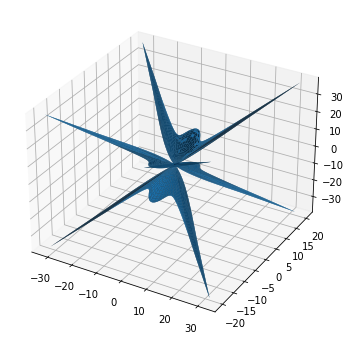

In [13]:
E = np.zeros([len(vphi), len(valpha)])
for n in range(N):
  for m in range(M):
      E = E + transducerPhase3D(n, m, d, vphi, valpha)

E_dB = 20 * np.log10(1/(N+M) * np.abs(E))

phi_grid, alpha_grid = np.meshgrid(vphi, valpha)

Y = np.sin(phi_grid) * np.sin(alpha_grid) * E_dB
Z = np.sin(alpha_grid) * E_dB
X = np.cos(phi_grid) * np.sin(alpha_grid) * E_dB

fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


In [20]:
vphi = np.transpose(np.arange(-np.pi, np.pi, np.pi/100))
valpha = np.arange(-np.pi, np.pi, np.pi/100)

N = 2
M = 2
d = wavelength/2

E = np.zeros([len(vphi), len(valpha)])
for n in range(N):
    for m in range(M):
        E = E + transducerPhase3D(n, m, d, vphi, valpha)

E_dB = 20 * np.log10(1/(N+M) * np.abs(E))

phi_grid, alpha_grid = np.meshgrid(vphi, valpha)

# Y = np.sin(phi_grid) * E_dB
# Z = np.sin(alpha_grid) * Y
# X = np.cos(alpha_grid) * Y

Y = np.sin(phi_grid) * np.sin(alpha_grid) * E_dB
Z = np.sin(alpha_grid) * E_dB
X = np.cos(phi_grid) * np.sin(alpha_grid) * E_dB

#   fig = plt.figure(figsize=[6, 6])
#   ax = fig.add_subplot(111, projection='3d')
#   ax.plot_surface(X,Y,Z)
#   plt.show()
surface = go.Surface(x=X, y=Y, z=Z)

data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()
